In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# "C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\03 Scripts\Task 6.3.ipynb"
path = r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6'

In [9]:
# "C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\02 Data\Prepared Data\All_rgs.csv"
rgs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'rgs_checked.csv'))

In [10]:
rgs.head()

Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament     city   country  neutral team scorer  minute own_goal penalty  \
0   Friendly  Glasgow  Scotland    False  NaN    NaN     NaN      NaN     NaN   
1   Friendly   London   England    False  NaN    NaN     NaN      NaN     NaN   
2   Friendly  Glasgow  Scotland    False  NaN    NaN     NaN      NaN     NaN   
3   Friendly   London   England    False  NaN    NaN     NaN      NaN     NaN   
4   Friendly  Glasgow  Scotland    False  NaN    NaN     NaN      NaN     NaN   

  winner first_shooter match_time  
0    NaN           NaN        NaN  
1    NaN           NaN        NaN  
2    NaN           NaN        NaN  
3    NaN           NaN        NaN  
4    NaN           NaN        NaN

In [6]:
rgs = rgs.drop(columns = 'Unnamed: 0')

In [7]:
rgs.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral team scorer  minute own_goal penalty winner  \
0  Scotland    False  NaN    NaN     NaN      NaN     NaN    NaN   
1   England    False  NaN    NaN     NaN      NaN     NaN    NaN   
2  Scotland    False  NaN    NaN     NaN      NaN     NaN    NaN   
3   England    False  NaN    NaN     NaN      NaN     NaN    NaN   
4  Scotland    False  NaN    NaN     NaN      NaN     NaN    NaN   

  first_shooter match_time  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN

In [11]:
country_kag = r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\02 Data\Original Data\archive.zip'

In [16]:
rgs['home_score'].value_counts(dropna = False)

home_score
1     18701
2     16579
0     14204
3     10093
4      6246
5      3301
6      2167
7      1132
8       799
9       510
10      223
11      152
12      127
13       76
14       51
16       36
31       31
15       22
22       22
19       21
17       19
21        2
30        1
24        1
18        1
20        1
Name: count, dtype: int64

In [17]:
rgs['away_score'].value_counts(dropna = False)

away_score
0     24740
1     22609
2     13870
3      6711
4      3205
5      1483
6       858
7       472
8       253
10      117
9        70
12       42
11       28
13       19
17       19
15        6
18        5
16        3
20        3
14        2
19        2
21        1
Name: count, dtype: int64

<Axes: xlabel='home_score', ylabel='Count'>

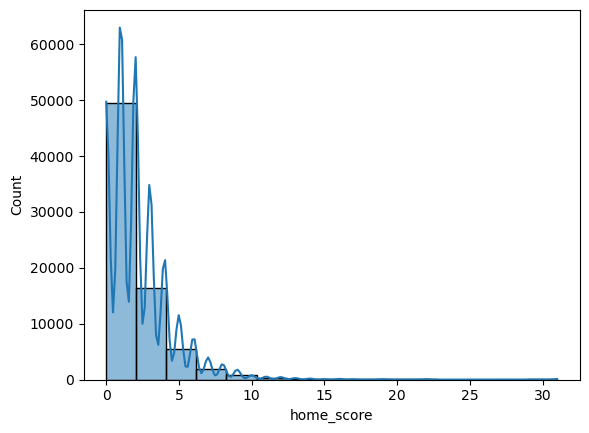

In [24]:
sns.histplot(rgs['home_score'], bins = 15, kde = True)

<Axes: xlabel='away_score', ylabel='Count'>

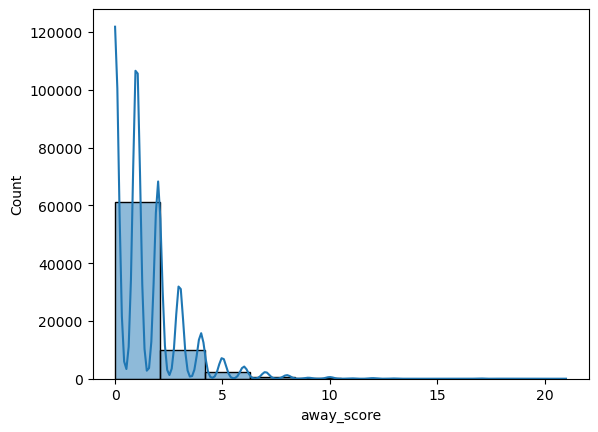

In [26]:
sns.histplot(rgs['away_score'], bins = 10, kde = True)

In [27]:
sub = rgs[['country', 'home_score']]
sub.head()

country  home_score
0  Scotland           0
1   England           4
2  Scotland           2
3   England           2
4  Scotland           3

In [33]:
sub.dtypes

country       object
home_score     int64
dtype: object

In [28]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\02 Data\Original Data\archive.zip',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 63: character maps to <undefined>

In [32]:
# Setup a folium map at a high-level zoom
#map = folium.Map(location = [100, 0], zoom_start = 1.5)
map = folium.Map(location = [100, 0], zoom_start = 1.5)
# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_kag,
    data = sub,
    columns = ['country', 'home_score'],
    key_on  = 'feature.properties.name',
    fill_color = 'YlOrBr',
    legends_name = 'home_score')
folium.LayerControl(). add_to(map)

Map
#folium.Choropleth(
 #   geo_data = country_geo, 
  #  data = data_to_plot,
   # columns = ['STATE_NAME', 'rating'],
    #key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    #fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    #legend_name = "rating").add_to(map)
#folium.LayerControl().add_to(map)

#map

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 63: character maps to <undefined>